In [1]:
from itertools import chain
from unicodedata import name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Initialize the important variables

In [7]:
# get the data
myData = pd.read_json("transaction-data-adhoc-analysis.json")
df = pd.DataFrame(myData)

In [11]:
# Testing
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [12]:
#Initialize Other Variables

In [13]:
# Will be needed to add columns later in the DataFrame
products = ['Beef Chicharon','Kimchi and Seaweed','Nutrional Milk','Gummy Vitamins','Yummy Vegetables','Orange Beans','Gummy Worms']
months = ['January', "February", "March", "April", "May", "June", "July", 'August', 'September', 'October', 'November', 'December']

In [14]:
# Convert the strings to DateTime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [15]:
# Since Months Are important, we'll create a month column
df['month'] = df["transaction_date"].dt.month_name()


In [54]:
# Testing
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms,Quantity,Price
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,January,4,0,0,0,0,0,0,4,1299
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022-01-12,January,3,0,0,0,0,0,0,3,4018
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022-01-12,January,0,0,4,0,0,0,0,4,3014
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022-01-12,January,0,0,0,0,0,1,0,1,12056
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022-01-08,January,0,0,0,3,0,0,0,3,1833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022-06-09,June,0,0,2,0,0,0,0,2,2140
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022-06-09,June,0,0,0,0,0,0,2,2,2140
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022-06-03,June,0,0,1,0,0,0,0,1,2639
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022-06-03,June,0,0,0,0,0,0,3,3,879


In [17]:
# Separate Items by ';' to create a list of bought item in one transaction
df["transaction_items"] = df["transaction_items"].str.split(';')

In [18]:
# explode or "un-nest" the transaction_items column
# Reference: https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe-into-multiple-rows
df = df.explode('transaction_items')

In [19]:
# Create new column of products and check if it contains that product
df[products[0]] = df['transaction_items'].str.contains(products[0])
df[products[1]] = df['transaction_items'].str.contains(products[1])
df[products[2]] = df['transaction_items'].str.contains(products[2])
df[products[3]] = df['transaction_items'].str.contains(products[3])
df[products[4]] = df['transaction_items'].str.contains(products[4])
df[products[5]] = df['transaction_items'].str.contains(products[5])
df[products[6]] = df['transaction_items'].str.contains(products[6])


In [20]:
# Create a Quantity column


In [21]:
# Get the Quantity of items the format is (x#)
# Basically removes the '(x' [hence -2] and ')' [hence -1]
df['Quantity'] = df["transaction_items"].str[-2:-1]

In [22]:
# convert "Quantity" to int
df["Quantity"] = df["Quantity"].astype('int')

In [23]:
# Test
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms,Quantity
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,January,True,False,False,False,False,False,False,4
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022-01-12,January,True,False,False,False,False,False,False,3
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022-01-12,January,False,False,True,False,False,False,False,4
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022-01-12,January,False,False,False,False,False,True,False,1
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022-01-08,January,False,False,False,True,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022-06-09,June,False,False,True,False,False,False,False,2
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022-06-09,June,False,False,False,False,False,False,True,2
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022-06-03,June,False,False,True,False,False,False,False,1
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022-06-03,June,False,False,False,False,False,False,True,3


In [24]:
# Since each product contains '0' or '1' and '1' means 'true' we can multiply it to get the total quantity of what ever the product did the customer buy
df[products[0]] = df[products[0]] * df['Quantity']
df[products[1]] = df[products[1]] * df['Quantity']
df[products[2]] = df[products[2]] * df['Quantity']
df[products[3]] = df[products[3]] * df['Quantity']
df[products[4]] = df[products[4]] * df['Quantity']
df[products[5]] = df[products[5]] * df['Quantity']
df[products[6]] = df[products[6]] * df['Quantity']

In [25]:
# Test
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms,Quantity
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,January,4,0,0,0,0,0,0,4
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022-01-12,January,3,0,0,0,0,0,0,3
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022-01-12,January,0,0,4,0,0,0,0,4
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022-01-12,January,0,0,0,0,0,1,0,1
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022-01-08,January,0,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022-06-09,June,0,0,2,0,0,0,0,2
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022-06-09,June,0,0,0,0,0,0,2,2
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022-06-03,June,0,0,1,0,0,0,0,1
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022-06-03,June,0,0,0,0,0,0,3,3


In [26]:
# Create Individual Price Column
df['Price'] = df['transaction_value']/df["Quantity"]
df['Price'] = df['Price'].astype('int')

In [27]:
# Test
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,Beef Chicharon,Kimchi and Seaweed,Nutrional Milk,Gummy Vitamins,Yummy Vegetables,Orange Beans,Gummy Worms,Quantity,Price
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,January,4,0,0,0,0,0,0,4,1299
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022-01-12,January,3,0,0,0,0,0,0,3,4018
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022-01-12,January,0,0,4,0,0,0,0,4,3014
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022-01-12,January,0,0,0,0,0,1,0,1,12056
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022-01-08,January,0,0,0,3,0,0,0,3,1833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022-06-09,June,0,0,2,0,0,0,0,2,2140
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022-06-09,June,0,0,0,0,0,0,2,2,2140
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022-06-03,June,0,0,1,0,0,0,0,1,2639
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012-04-30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022-06-03,June,0,0,0,0,0,0,3,3,879


In [28]:
# Get the Total Number of Sold per product
pr_0 = df[products[0]].sum()
pr_1 = df[products[1]].sum()
pr_2 = df[products[2]].sum()
pr_3 = df[products[3]].sum()
pr_4 = df[products[4]].sum()
pr_5 = df[products[5]].sum()
pr_6 = df[products[6]].sum()

In [29]:
# Test
print(pr_0)
print(pr_1)
print(pr_2)
print(pr_3)
print(pr_4)
print(pr_5)
print(pr_6)

59302
59390
58728
59576
59429
59406
59319


In [30]:
# Create a new data frame for summary of reports in relates to product (Will more later)
df_prod = pd.DataFrame([pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6],columns=['Total Sold'])
df_prod.index = [products[0],products[1],products[2],products[3],products[4],products[5],products[6]]

In [31]:
# Remove all duplicated indices and save it to a new DataFrame
df_r = df[~df.index.duplicated(keep=False)]


In [58]:
df_prod['Price'] = df_r['Price'].unique()
print(df_prod.head(50))

                    Total Sold  Price  January  February  March  April    May  \
Beef Chicharon           59302   1299     9665     10001   9816   9890  10028   
Kimchi and Seaweed       59390    500     9676      9949   9967   9921   9773   
Nutrional Milk           58728    799     9727      9691   9876   9786   9881   
Gummy Vitamins           59576    150     9681      9980  10145   9842   9948   
Yummy Vegetables         59429   1500     9959     10256   9896   9861   9735   
Orange Beans             59406   1990     9774     10037   9611   9914   9964   
Gummy Worms              59319    199     9559      9996   9986  10043   9801   

                     June  July  August  September  October  November  \
Beef Chicharon       9902   0.0     0.0        0.0      0.0       0.0   
Kimchi and Seaweed  10104   0.0     0.0        0.0      0.0       0.0   
Nutrional Milk       9767   0.0     0.0        0.0      0.0       0.0   
Gummy Vitamins       9980   0.0     0.0        0.0      0.0

In [33]:
pr_m0 = [0,0,0,0,0,0,0]
pr_m1 = [0,0,0,0,0,0,0]
pr_m2 = [0,0,0,0,0,0,0]
pr_m3 = [0,0,0,0,0,0,0]
pr_m4 = [0,0,0,0,0,0,0]
pr_m5 = [0,0,0,0,0,0,0]
pr_m6 = [0,0,0,0,0,0,0]
pr_m7 = [0,0,0,0,0,0,0]
pr_m8 = [0,0,0,0,0,0,0]
pr_m9 = [0,0,0,0,0,0,0]
pr_m10 = [0,0,0,0,0,0,0]
pr_m11 = [0,0,0,0,0,0,0]

In [34]:
# To avoid rewriting the same code
def getSoldInMonth(productIndex):
    for i in range(0, 12):
        filt = (df['month'] == months[i]) & (df[products[productIndex]] > 0)
        #Reference: https://stackoverflow.com/questions/70897794/finding-the-mean-of-nuisance-columns-in-dataframe-error
        soldVal = df[filt].sum(numeric_only=True)[['Quantity']][0]
        if i == 0:
            pr_m0[productIndex] = soldVal
        elif i == 1:
            pr_m1[productIndex] = soldVal
        elif i == 2:
            pr_m2[productIndex] = soldVal
        elif i == 3:
            pr_m3[productIndex] = soldVal
        elif i == 4:
            pr_m4[productIndex] = soldVal
        elif i == 5:
            pr_m5[productIndex] = soldVal
        elif i == 6:
            pr_m6[productIndex] = soldVal
        elif i == 7:
            pr_m7[productIndex] = soldVal
        elif i == 8:
            pr_m8[productIndex] = soldVal
        elif i == 9:
            pr_m9[productIndex] = soldVal
        elif i == 10:
            pr_m10[productIndex] = soldVal
        elif i == 11:
            pr_m11[productIndex] = soldVal

In [35]:
# Get for product[0] all months and save it to the corresponding pr_m#
getSoldInMonth(0)
getSoldInMonth(1)
getSoldInMonth(2)
getSoldInMonth(3)
getSoldInMonth(4)
getSoldInMonth(5)
getSoldInMonth(6)


In [36]:
# testing
print(pr_m0)
print(pr_m1)
print(pr_m2)
print(pr_m3)
print(pr_m4)
print(pr_m5)
print(pr_m6)

[9665, 9676, 9727, 9681, 9959, 9774, 9559]
[10001, 9949, 9691, 9980, 10256, 10037, 9996]
[9816, 9967, 9876, 10145, 9896, 9611, 9986]
[9890, 9921, 9786, 9842, 9861, 9914, 10043]
[10028, 9773, 9881, 9948, 9735, 9964, 9801]
[9902, 10104, 9767, 9980, 9722, 10106, 9934]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
# Add Individual months column in df_prod
df_prod[months[0]] = pr_m0
df_prod[months[1]] = pr_m1
df_prod[months[2]] = pr_m2
df_prod[months[3]] = pr_m3
df_prod[months[4]] = pr_m4
df_prod[months[5]] = pr_m5
df_prod[months[6]] = pr_m6
df_prod[months[7]] = pr_m7
df_prod[months[8]] = pr_m8
df_prod[months[9]] = pr_m9
df_prod[months[10]] = pr_m10
df_prod[months[11]] = pr_m11

In [59]:
# Test
print(df_prod.head(50))

                    Total Sold  Price  January  February  March  April    May  \
Beef Chicharon           59302   1299     9665     10001   9816   9890  10028   
Kimchi and Seaweed       59390    500     9676      9949   9967   9921   9773   
Nutrional Milk           58728    799     9727      9691   9876   9786   9881   
Gummy Vitamins           59576    150     9681      9980  10145   9842   9948   
Yummy Vegetables         59429   1500     9959     10256   9896   9861   9735   
Orange Beans             59406   1990     9774     10037   9611   9914   9964   
Gummy Worms              59319    199     9559      9996   9986  10043   9801   

                     June  July  August  September  October  November  \
Beef Chicharon       9902   0.0     0.0        0.0      0.0       0.0   
Kimchi and Seaweed  10104   0.0     0.0        0.0      0.0       0.0   
Nutrional Milk       9767   0.0     0.0        0.0      0.0       0.0   
Gummy Vitamins       9980   0.0     0.0        0.0      0.0

In [39]:
# Get the Total Sale
df_sale = pd.DataFrame()
df_sale[months[0]] = df_prod[months[0]]  * df_prod['Price']
df_sale[months[1]] = df_prod[months[1]]  * df_prod['Price']
df_sale[months[2]] = df_prod[months[2]]  * df_prod['Price']
df_sale[months[3]] = df_prod[months[3]]  * df_prod['Price']
df_sale[months[4]] = df_prod[months[4]]  * df_prod['Price']
df_sale[months[5]] = df_prod[months[5]]  * df_prod['Price']
df_sale[months[6]] = df_prod[months[6]]  * df_prod['Price']
df_sale[months[7]] = df_prod[months[7]]  * df_prod['Price']
df_sale[months[8]] = df_prod[months[8]]  * df_prod['Price']
df_sale[months[9]] = df_prod[months[9]]  * df_prod['Price']
df_sale[months[10]] = df_prod[months[10]] * df_prod['Price']
df_sale[months[11]] = df_prod[months[11]] * df_prod['Price']


In [60]:
# Test
print(df_sale.head())


                     January  February     March     April       May  \
Beef Chicharon      12554835  12991299  12750984  12847110  13026372   
Kimchi and Seaweed   4838000   4974500   4983500   4960500   4886500   
Nutrional Milk       7771873   7743109   7890924   7819014   7894919   
Gummy Vitamins       1452150   1497000   1521750   1476300   1492200   
Yummy Vegetables    14938500  15384000  14844000  14791500  14602500   

                        June  July  August  September  October  November  \
Beef Chicharon      12862698   0.0     0.0        0.0      0.0       0.0   
Kimchi and Seaweed   5052000   0.0     0.0        0.0      0.0       0.0   
Nutrional Milk       7803833   0.0     0.0        0.0      0.0       0.0   
Gummy Vitamins       1497000   0.0     0.0        0.0      0.0       0.0   
Yummy Vegetables    14583000   0.0     0.0        0.0      0.0       0.0   

                    December  
Beef Chicharon           0.0  
Kimchi and Seaweed       0.0  
Nutrional Milk   

In [42]:
df_monthlySale = pd.DataFrame(
    {
        months[0]: df_prod[months[0]].values,
        months[1]: df_prod[months[1]].values,
        months[2]: df_prod[months[2]].values,
        months[3]: df_prod[months[3]].values,
        months[4]: df_prod[months[4]].values,
        months[5]: df_prod[months[5]].values,
    },
    index=[
        products[0],
        products[1],
        products[2],
        products[3],
        products[4],
        products[5],
        products[6],
    ]
)

In [61]:
print(df_monthlySale.head())

                    January  February  March  April    May   June
Beef Chicharon         9665     10001   9816   9890  10028   9902
Kimchi and Seaweed     9676      9949   9967   9921   9773  10104
Nutrional Milk         9727      9691   9876   9786   9881   9767
Gummy Vitamins         9681      9980  10145   9842   9948   9980
Yummy Vegetables       9959     10256   9896   9861   9735   9722


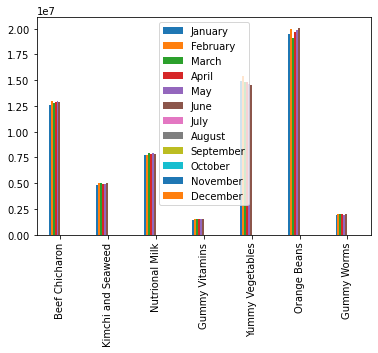

In [44]:
df_sale.plot(kind="bar")
plt.show()

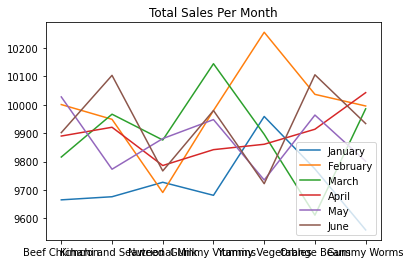

In [45]:
df_monthlySale.plot.line(title="Total Sales Per Month")
plt.show()

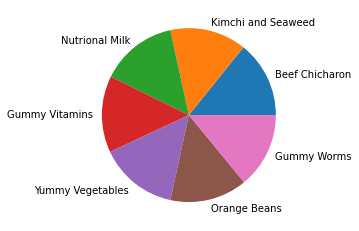

In [47]:
plt.pie(df_prod[months[0]].values, labels=products)
plt.show()

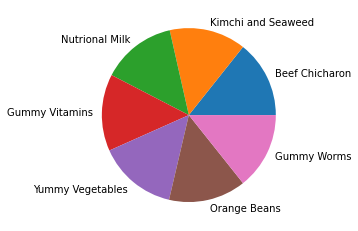

In [48]:
plt.pie(df_prod[months[1]].values, labels=products)
plt.show()

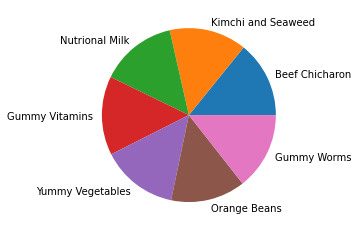

In [49]:
plt.pie(df_prod[months[2]].values, labels=products)
plt.show()

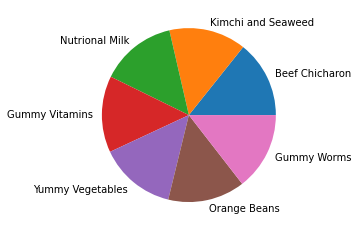

In [50]:
plt.pie(df_prod[months[3]].values, labels=products)
plt.show()

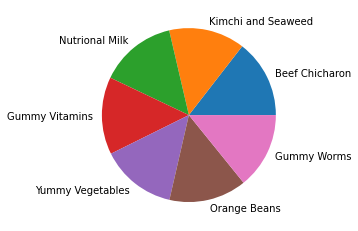

In [51]:
plt.pie(df_prod[months[4]].values, labels=products)
plt.show()

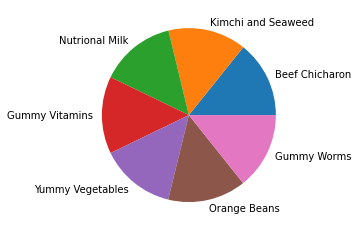

In [52]:
plt.pie(df_prod[months[5]].values, labels=products)
plt.show()